In [ ]:
#@title Get Data
%%bash
# pip install kaggle
mkdir ~/.kaggle
cp /content/drive/MyDrive/code_that/kaggle.json ~/.kaggle/kaggle.json
chmod 600 ~/.kaggle/kaggle.json
kaggle datasets download -d andrewmvd/road-sign-detection
unzip road-sign-detection.zip -d data
mv ./data/annotations ./data/labels

In [63]:
#@title get preprocessing to current directory
!cp /content/drive/MyDrive/code_that/preprocessing.py .

In [64]:
#@title Convert Pascal VOC to YOLO Format
#@markdown yolo can't use pascal format so need to change for yolo format
from preprocessing import convert_voc_to_yolo

In [65]:
convert_voc_to_yolo()

In [ ]:
#@title Get YOLOv5

!git clone https://github.com/ultralytics/yolov5
!cd /content/yolov5
!pip install -r /content/yolov5/requirements.txt


In [ ]:

!mv /content/yolov5/data/VOC.yaml /content/yolov5/


In [ ]:
!mv /content/yolov5/VOC.yaml /content/yolov5/customVOC.yaml

In [68]:
#@title train model

!cd yolov5 && python train.py --img 320 --batch 16 --epochs 50 --data customVOC.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=customVOC.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v7.0-10-g10c025d Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_

In [69]:
#@title make detections 
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import itertools

In [72]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./yolov5/runs/train/exp6/weights/best.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-30 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


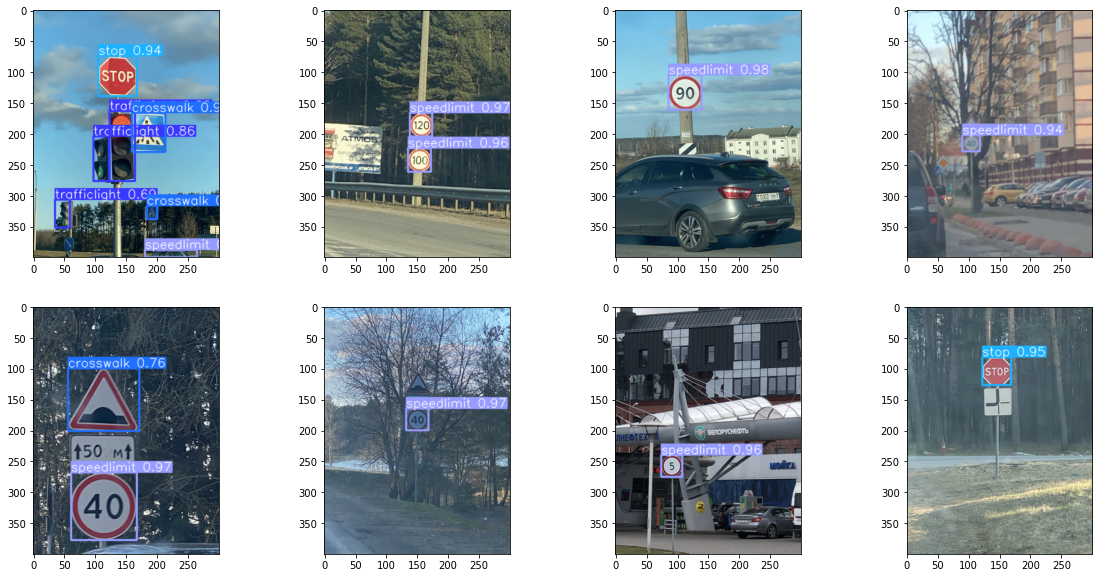

In [73]:
%matplotlib inline
fig, ax = plt.subplots(2,4, figsize=(20,10))
imgs = os.listdir('/content/data/images')

for idx in itertools.product(range(2),range(4)): 
    imgname = np.random.choice(imgs)
    img = cv2.imread(f'/content/data/images/{imgname}')
    results = model(img)
    ax[idx[0],idx[1]].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))